In [2]:
import numpy as np
from numpy import exp, vectorize, zeros, arange
from scipy.special import eval_legendre
from scipy.integrate import quad
from scipy.special import  gammainc, factorial2, gamma, erf
from math import factorial 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")

In [3]:
def seriel_kernel(mu,eps):
    c = 2*np.pi*2/np.sqrt(np.pi)/erf(2/eps)
    return c/eps*exp(-(1-mu)**2/eps**2)
kernel = vectorize(seriel_kernel)
def seriel_kernelhg(mu,g):
    return (1-g**2)/2/(1-2*g*mu+g**2)**(3.0/2.0)
kernelhg = vectorize(seriel_kernelhg)


In [4]:
def serial_integrand(mu,eps,n):
    return kernel(mu,eps)*eval_legendre(n,mu)
integrand = vectorize(serial_integrand)
def serial_integrandhg(mu,eps,n):
    return kernelhg(mu,eps)*eval_legendre(n,mu)
integrandhg = vectorize(serial_integrandhg)

In [7]:
ns = arange(51)
epsilonshg = [0.01,0.9,0.99]
abserrshg = zeros((len(ns),len(epsilonshg)))
valshg = zeros((len(ns),len(epsilonshg)))

for i, n in enumerate(ns):
    for j,eps in enumerate(epsilonshg):
        val,abserr = quad(integrandhg,-1,+1,args=(eps,n))
        valshg[i,j] = abs(val)
        abserrshg[i,j] = abserr
np.savetxt("coeffshg.txt",valshg)
np.savetxt("errorshg.txt",abserrshg)



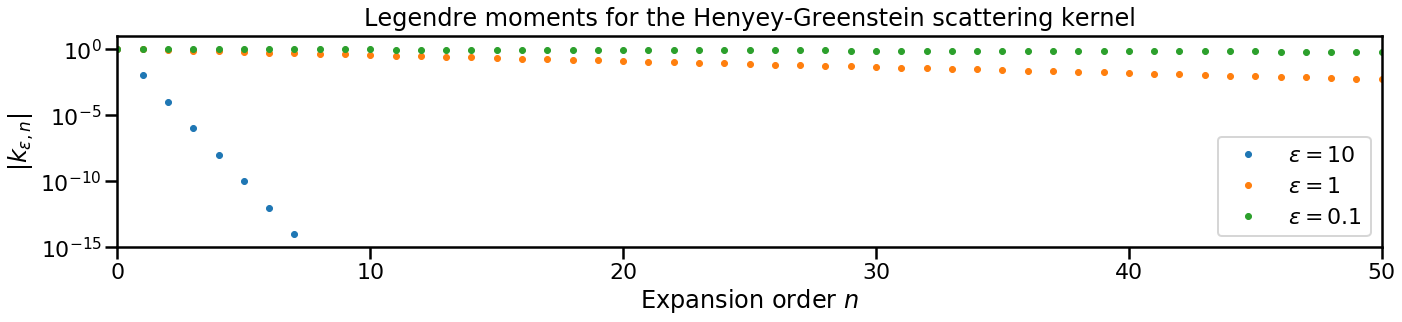

In [8]:
fig,ax = plt.subplots(1,1,figsize=(20,5))
#ax = axs[0]
for j,eps in enumerate(epsilonshg):
    ax.semilogy(ns,valshg[:,j],'.')
ax.legend([r"$\epsilon={}$".format(eps) for eps in epsilons],loc = "lower right")

ax.set_xlabel(r"Expansion order $n$")
ax.set_ylabel(r"$|k_{\epsilon,n}|$")
ax.set_ylim([1e-15,1e1])
ax.set_title("Legendre moments for the Henyey-Greenstein scattering kernel", pad = 10)
ax.set_xlim([0,50])


plt.tight_layout()
plt.savefig("HGmoments.png",dpi = 400)



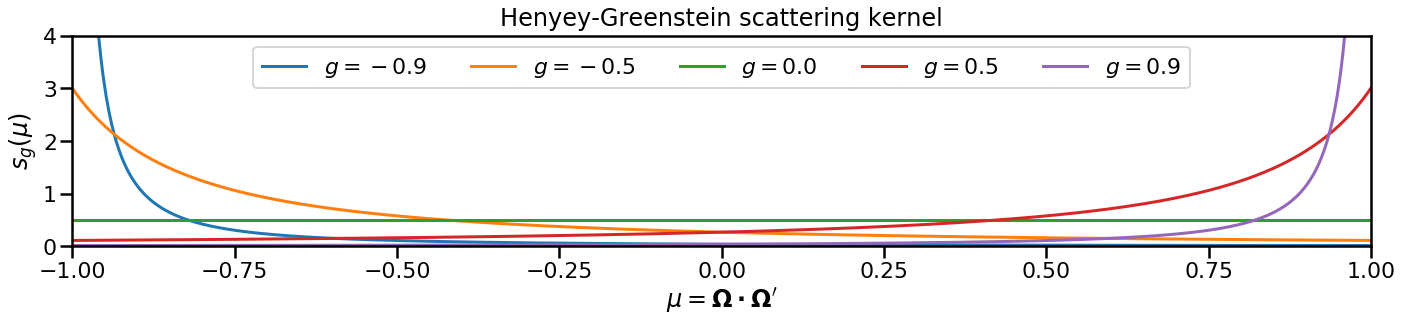

In [28]:
fig,ax = plt.subplots(1,1,figsize=(20,5))
mu = np.linspace(-1,1,1000)
epsilonshg = [-0.9,-0.5,0.0,0.5,0.9]


for j,eps in enumerate(epsilonshg):
    ax.plot(mu,seriel_kernelhg(mu,eps))
    
    
ax.legend([r"$g={}$".format(eps) for eps in epsilonshg],loc = "upper center",ncol = 5)

ax.set_xlabel(r"$\mu=\bf{\Omega}\cdot\bf{\Omega'}$")
ax.set_ylabel(r"$s_g(\mu)$")
ax.set_ylim([0,4])
ax.set_title("Henyey-Greenstein scattering kernel", pad = 10)
ax.set_xlim([-1,1])


plt.tight_layout()
plt.savefig("HGkernel.png",dpi = 400)